# ENGLISH TO FRENCH TRANSLATOR USING LSTM

### IMPORT LIBRARIES AND DATASETS

In [2]:
!pip install --upgrade tensorflow-gpu==2.0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0 (from versions: 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.7.0rc0, 2.7.0rc1)
ERROR: No matching distribution found for tensorflow-gpu==2.0


In [3]:
# install nltk
!pip install nltk
# install gensim
!pip install gensim
# install spacy
!pip install spacy
!pip install plotly

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\NASIR
[nltk_data]     KHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

import warnings
warnings.filterwarnings('ignore')

In [6]:
# load the data
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])

In [7]:
df_english.head(3)


english
0  new jersey is sometimes quiet during autumn , ...
1  the united states is usually chilly during jul...
2  california is usually quiet during march , and...

In [8]:
df_french.head(3)

french
0  new jersey est parfois calme pendant l' automn...
1  les états-unis est généralement froid en juill...
2  california est généralement calme en mars , et...

In [9]:
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [10]:
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [11]:
# Concatenate both dataframes 

df = pd.concat([df_english, df_french], axis=1)

In [12]:
df

english  \
0       new jersey is sometimes quiet during autumn , ...   
1       the united states is usually chilly during jul...   
2       california is usually quiet during march , and...   
3       the united states is sometimes mild during jun...   
4       your least liked fruit is the grape , but my l...   
...                                                   ...   
137855  france is never busy during march , and it is ...   
137856  india is sometimes beautiful during spring , a...   
137857  india is never wet during summer , but it is s...   
137858  france is never chilly during january , but it...   
137859  the orange is her favorite fruit , but the ban...   

                                                   french  
0       new jersey est parfois calme pendant l' automn...  
1       les états-unis est généralement froid en juill...  
2       california est généralement calme en mars , et...  
3       les états-unis est parfois légère en juin , et...  
4       votre moins aimé fruit est le raisin , mais mo...  
...                                                   ...  
137855  la france est jamais occupée en mars , et il e...  
137856  l' inde est parfois belle au printemps , et il...  
137857  l' inde est jamais mouillé pendant l' été , ma...  
137858  la france est jamais froid en janvier , mais i...  
137859  l'orange est son fruit préféré , mais la banan...  

[137860 rows x 2 columns]

In [13]:
print('Total English Records = {}'.format(len(df['english'])))
                                              
print('Total French Records = {}'.format(len(df['french'])))
                                                            

Total English Records = 137860
Total French Records = 137860


### PERFORM DATA CLEANING

In [14]:
# download nltk packages
nltk.download('punkt')

# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package punkt to C:\Users\NASIR
[nltk_data]     KHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\NASIR
[nltk_data]     KHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# function to remove punctuations

def remove_punc(x):
    return re.sub('[!#?,.:";]', '', x)

In [16]:
df_english = df['english'].apply(remove_punc)
df_french = df['french'].apply(remove_punc)

In [17]:
# Create Lists

english_words = []
french_words = []

In [18]:
# Get unique words are available in the english and french dictionairies

def get_unique_words(x, word_list):
    for word in x.split():
        if word not in word_list:
            word_list.append(word)
            
df['english'].apply(lambda x: get_unique_words(x, english_words))
df['french'].apply(lambda x: get_unique_words(x, french_words))

0         None
1         None
2         None
3         None
4         None
          ... 
137855    None
137856    None
137857    None
137858    None
137859    None
Name: french, Length: 137860, dtype: object

In [19]:
df['english']

0         new jersey is sometimes quiet during autumn , ...
1         the united states is usually chilly during jul...
2         california is usually quiet during march , and...
3         the united states is sometimes mild during jun...
4         your least liked fruit is the grape , but my l...
                                ...                        
137855    france is never busy during march , and it is ...
137856    india is sometimes beautiful during spring , a...
137857    india is never wet during summer , but it is s...
137858    france is never chilly during january , but it...
137859    the orange is her favorite fruit , but the ban...
Name: english, Length: 137860, dtype: object

In [20]:
english_words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 ',',
 'and',
 'it',
 'snowy',
 'in',
 'april',
 '.',
 'the',
 'united',
 'states',
 'usually',
 'chilly',
 'july',
 'freezing',
 'november',
 'california',
 'march',
 'hot',
 'june',
 'mild',
 'cold',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'grape',
 'but',
 'my',
 'apple',
 'his',
 'favorite',
 'orange',
 'paris',
 'relaxing',
 'december',
 'busy',
 'spring',
 'never',
 'our',
 'lemon',
 'january',
 'warm',
 'lime',
 'her',
 'banana',
 'he',
 'saw',
 'a',
 'old',
 'yellow',
 'truck',
 'india',
 'rainy',
 'that',
 'cat',
 'was',
 'most',
 'loved',
 'animal',
 'dislikes',
 'grapefruit',
 'limes',
 'lemons',
 'february',
 'china',
 'pleasant',
 'october',
 'wonderful',
 'nice',
 'summer',
 'france',
 'may',
 'grapes',
 'mangoes.',
 'their',
 'mango',
 'pear',
 'august',
 'beautiful',
 'apples',
 'peaches',
 'feared',
 'shark',
 'wet',
 'dry',
 'we',
 'like',
 'oranges',
 'mangoes',
 'they',
 'pears',
 

In [21]:
total_english_words = len(english_words)
total_english_words

227

In [22]:
total_french_words = len(french_words)
total_french_words

355

### VISUALIZE CLEANED UP DATASET

In [23]:
# Obtain list of all words in the dataset

words = []
for i in df['english']:
    for word in i.split():
        words.append(word)
        
words
        
    


['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 ',',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 '.',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 ',',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 '.',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 ',',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 '.',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 ',',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 '.',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 ',',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 '.',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 ',',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 '.',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 ',',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 '.',
 'new',
 'jersey',
 'is',
 'busy',
 'during'

In [24]:
# Obtain the total count of words

english_words_counts = Counter(words)
english_words_counts

Counter({'new': 12197,
         'jersey': 11225,
         'is': 205858,
         'sometimes': 37746,
         'quiet': 8693,
         'during': 74933,
         'autumn': 9004,
         ',': 140897,
         'and': 59850,
         'it': 75137,
         'snowy': 8898,
         'in': 75525,
         'april': 8954,
         '.': 129039,
         'the': 67628,
         'united': 11270,
         'states': 11270,
         'usually': 37507,
         'chilly': 8770,
         'july': 8956,
         'freezing': 8928,
         'november': 8951,
         'california': 11250,
         'march': 9023,
         'hot': 8639,
         'june': 9133,
         'mild': 8743,
         'cold': 8878,
         'september': 8958,
         'your': 9734,
         'least': 27564,
         'liked': 13546,
         'fruit': 27105,
         'grape': 4703,
         'but': 63987,
         'my': 9700,
         'apple': 4652,
         'his': 9700,
         'favorite': 27371,
         'orange': 4651,
         'paris': 11334

In [25]:
# sort the dictionary by values

english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [26]:
english_words_counts

[('is', 205858),
 (',', 140897),
 ('.', 129039),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('least', 27564),
 ('favorite', 27371),
 ('fruit', 27105),
 ('most', 14934),
 ('loved', 13666),
 ('liked', 13546),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10118),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 

In [27]:
# Append the values to a list for visualization purposes

english_words = []
english_counts = []

for i in range(len(english_words_counts)):
    english_words.append(english_words_counts[i][0])
    english_counts.append(english_words_counts[i][1])

In [28]:
english_words

['is',
 ',',
 '.',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'least',
 'favorite',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'mangoes',
 'lemons',
 'grapes',
 'apples',
 'oranges',
 'strawberries',
 'bananas',
 'peaches',
 'pears',
 'to',
 'strawberry',
 'grape',
 'lime',
 'apple',
 'lemon',
 'banana',
 'mango',
 'pear',
 'peach',
 'orange',
 'like',
 'dislike',
 'they',
 'that',
 

In [29]:
english_counts

[205858,
 140897,
 129039,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 27564,
 27371,
 27105,
 14934,
 13666,
 13546,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10118,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5554,
 5549,
 5533,
 5525,
 5452,
 5452,
 5452,
 5452,
 5451,
 5451,
 5166,
 4715,
 4703,
 4680,
 4652,
 4652,
 4652,
 4652,
 4652,
 4652,
 4651,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 961,
 870,
 811,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 574,
 540,
 500,
 500,
 480,
 476,
 393,
 393,
 39

In [30]:
# Plot Barplot using plotly

fig = px.bar(x = english_words, y = english_counts)
fig.show()

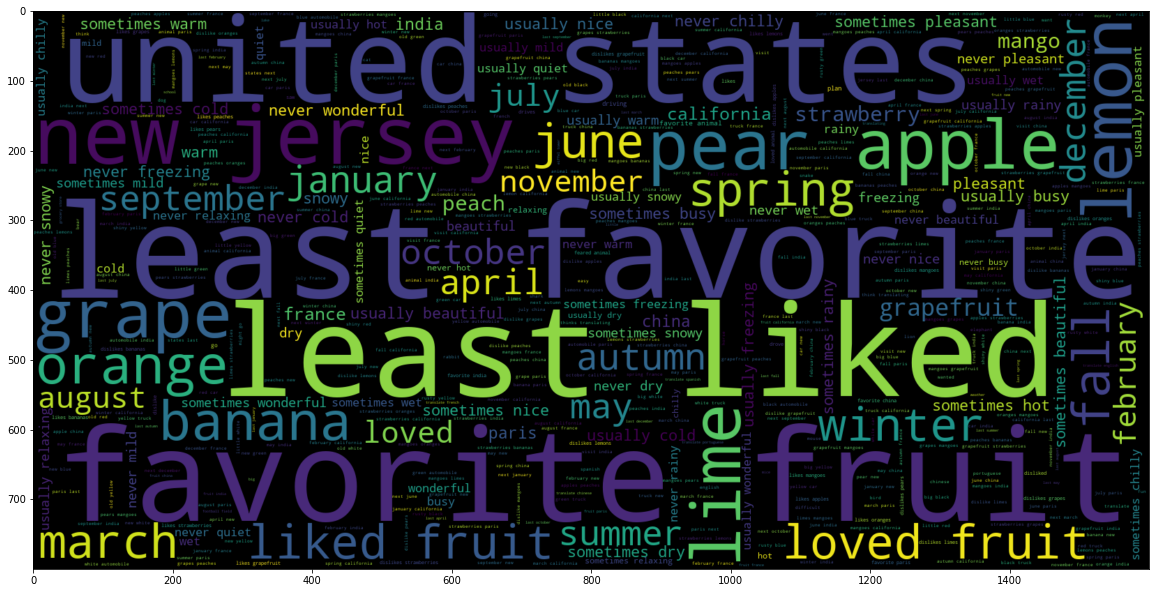

In [31]:
# Plot the WordCloud for text that is Real

plt.figure(figsize = (20,20))
wc = WordCloud(max_words=2000, width=1600, height=800).generate(''.join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [32]:
df.english[0]
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 ',',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 '.']

In [33]:
# Maximum length (numbers of words) per document. We will need it later fot embeddings

maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
        
print('The Maximum Number of Words In Any Document = ', maxlen_english)

The Maximum Number of Words In Any Document =  17


The Maximum Number of Words In Any Document =  25


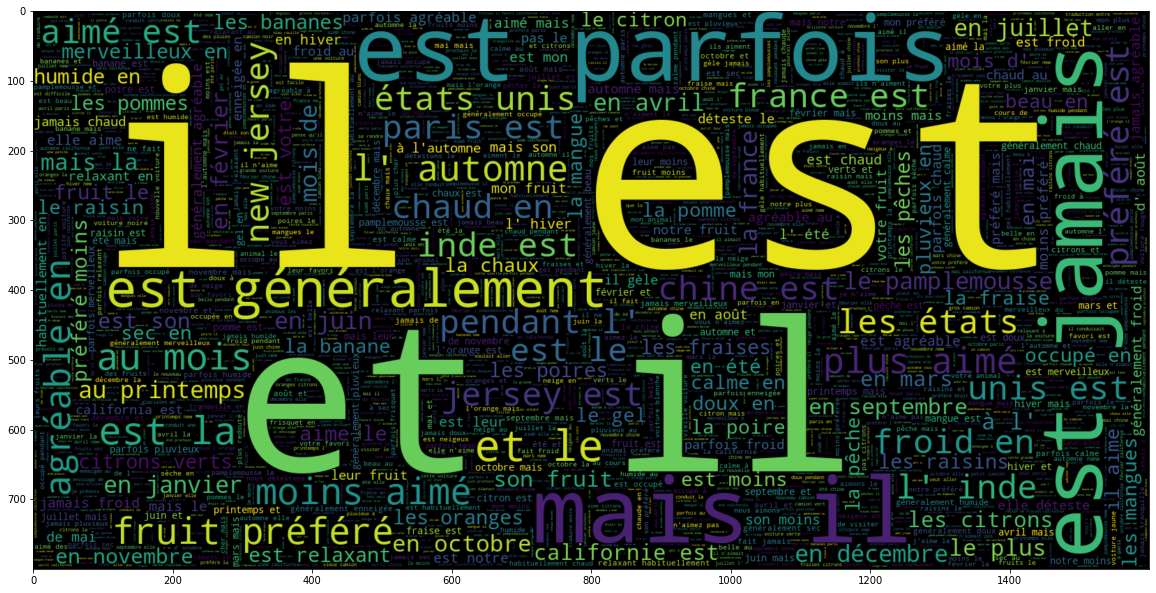

In [34]:
# DATA VISUALIZATION FOR THE FRENCH LANGUAGE

# Obtain the count of french words
words = []
for i in df['french']:
    for word in i.split():
        words.append(word)
        
words

# Obtain the total count of words

french_words_counts = Counter(words)
french_words_counts

# sort the dictionary by values

french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

# Append the values to a list for visualization purposes

french_words = []
french_counts = []

for i in range(len(french_words_counts)):
    french_words.append(french_words_counts[i][0])
    french_counts.append(french_words_counts[i][1])
    
    
# Plot Barplot using plotly

fig = px.bar(x = french_words, y = french_counts)
fig.show()


# Plot the WordCloud for text that is Real

plt.figure(figsize = (20,20))
wc = WordCloud(max_words=2000, width=1600, height=800).generate(''.join(df.french))
plt.imshow(wc, interpolation = 'bilinear')


# Maximum length (numbers of words) per document. We will need it later fot embeddings

maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
        
print('The Maximum Number of Words In Any Document = ', maxlen_french)

### PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

In [35]:
def tokenize_and_padding(x, maxlen):
    # A tokenizer to tokenize the words and create sequence of tokenized words
    
    tokenizer = Tokenizer(char_level=False)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen=maxlen, padding='post')
    
    return tokenizer, sequences, padded

In [36]:
# Tokenize and Padding th the Data

x_tokenizer, x_sequences, x_padded = tokenize_and_padding(df_english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_padding(df_french, maxlen_french)

In [37]:
# Total Vocab Size, Since We Added Padding We Add  To The Total Count

english_vocab_size = total_english_words + 1
print('Complete English Vocab Size', english_vocab_size)

Complete English Vocab Size 228


In [38]:
# Total Vocab Size, Since We Added Padding We Add  To The Total Count

french_vocab_size = total_french_words + 1
print('Complete French Vocab Size', french_vocab_size)

Complete French Vocab Size 356


In [39]:
print('The Tokenized Version For English Document\n', df.english[-1:].item(),'\n',x_padded[-1:])

The Tokenized Version For English Document
 the orange is her favorite fruit , but the banana is your favorite . 
 [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0  0  0]]


In [40]:
print('The Tokenized Version For French Document\n', df.french[-1:].item(),'\n',y_padded[-1:])

The Tokenized Version For French Document
 l'orange est son fruit préféré , mais la banane est votre favori . 
 [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]]


In [41]:

#  Change the padding length so that both english and french have the same length

x_tokenizer, x_sequences, x_padded = tokenize_and_padding(df_english, maxlen_french)
y_tokenizer, y_sequences, y_padded = tokenize_and_padding(df_french, maxlen_french)

### BUILD AND TRAIN THE MODEL

In [42]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.2)

In [43]:
# Total Vocab Size, Since We Added Padding We Add 1 To The Total Word Count

english_vocab_size = total_english_words + 1
french_vocab_size = total_french_words + 1

# Sequential Model
model = Sequential()

# Embedding Layer
model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))

# Encoder
model.add(LSTM(256))

# Decoder
# RepeatVector Repeats The Input For The Desired Number Of Times To Change
# 2D-Array to 3D-Array. For Example: (1, 256) to (1, 23, 256)

model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences = True))
model.add(TimeDistributed(Dense(french_vocab_size, activation = 'softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 17, 256)           58368     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 25, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 256)           525312    
_________________________________________________________________
time_distributed (TimeDistri (None, 25, 356)           91492     
Total params: 1,200,484
Trainable params: 1,200,484
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Change The Shape Of  Target From 2D tO 3D

y_train = np.expand_dims(y_train, axis=2)
y_train.shape

(110288, 25, 1)

In [45]:
# Train Model

model.fit(x_train, y_train, batch_size=1024, validation_split=0.1, epochs =25)

Epoch 1/25
97/97 [==============================] - 233s 2s/step - loss: 2.6050 - accuracy: 0.5286 - val_loss: 1.9983 - val_accuracy: 0.5650
Epoch 2/25
97/97 [==============================] - 309s 3s/step - loss: 1.8504 - accuracy: 0.5921 - val_loss: 1.6299 - val_accuracy: 0.6260
Epoch 3/25
97/97 [==============================] - 427s 4s/step - loss: 1.4882 - accuracy: 0.6357 - val_loss: 1.3679 - val_accuracy: 0.6453
Epoch 4/25
97/97 [==============================] - 280s 3s/step - loss: 1.2972 - accuracy: 0.6605 - val_loss: 1.2123 - val_accuracy: 0.6776
Epoch 5/25
97/97 [==============================] - 217s 2s/step - loss: 1.1560 - accuracy: 0.6856 - val_loss: 1.0778 - val_accuracy: 0.6969
Epoch 6/25
97/97 [==============================] - 218s 2s/step - loss: 1.0228 - accuracy: 0.7094 - val_loss: 0.9604 - val_accuracy: 0.7267
Epoch 7/25
97/97 [==============================] - 221s 2s/step - loss: 0.9092 - accuracy: 0.7412 - val_loss: 0.8529 - val_accuracy: 0.7557
Epoch 8/25
97

### SAVE THE MODEL

In [46]:
# Save The Model
model.save('model.h5')

### ASSESS TRAINED MODEL PERFORMANCE

In [47]:
x_test.shape

(27572, 25)

In [48]:
x_test

array([[26, 70, 80, ...,  0,  0,  0],
       [22,  1, 10, ...,  0,  0,  0],
       [22,  1,  8, ...,  0,  0,  0],
       ...,
       [18,  1, 59, ...,  0,  0,  0],
       [ 5, 86,  1, ...,  0,  0,  0],
       [18,  1,  9, ...,  0,  0,  0]])

In [49]:
x_test[0]

array([26, 70, 80, 72,  7, 74,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [50]:
y_predict = model.predict(x_test)

In [51]:
y_predict

array([[[1.1789034e-07, 2.2714448e-05, 1.7059577e-09, ...,
         4.6632533e-09, 8.2855411e-09, 5.8315965e-09],
        [5.9107846e-10, 3.4396602e-05, 2.8394122e-11, ...,
         7.8837544e-12, 2.7380313e-11, 1.6853244e-11],
        [3.1697103e-09, 5.5239871e-06, 1.0370779e-09, ...,
         5.3009528e-12, 1.3661686e-11, 7.7415218e-12],
        ...,
        [9.9998927e-01, 1.7203565e-06, 3.2593420e-07, ...,
         9.6118480e-13, 2.8002780e-12, 3.3843193e-12],
        [9.9998939e-01, 1.4986213e-06, 3.1336896e-07, ...,
         9.7176965e-13, 2.7923473e-12, 3.3371168e-12],
        [9.9998939e-01, 1.6644592e-06, 3.1022302e-07, ...,
         9.4814206e-13, 2.7219563e-12, 3.3004723e-12]],

       [[6.3111656e-08, 7.3895359e-04, 7.1858999e-09, ...,
         1.4502376e-09, 2.0839612e-09, 2.1079511e-09],
        [2.3516683e-10, 9.9968624e-01, 4.2621648e-10, ...,
         2.5887330e-12, 7.3435936e-12, 4.3761197e-12],
        [4.5095172e-10, 1.5487159e-03, 2.4232679e-07, ...,
         7.639

In [58]:
# Function To Make Prediction

def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])   

In [59]:
def pad_to_text(padded, tokenizer):
    
    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''
    
    return ' '.join([id_to_word[j] for j in padded])

In [60]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - he likes bananas lemons and mangoes                   

Original French word - il aime les bananes les citrons et les mangues                

Predicted French word - il aime les bananes les citrons et les mangues                




Original English word - california is never mild during october and it is snowy in january             

Original French word - california est jamais doux en octobre et il est neigeux en janvier             

Predicted French word - california est jamais pluvieux en octobre et il est neigeux en janvier             




Original English word - california is sometimes wet during june and it is usually freezing in december            

Original French word - californie est parfois humide en juin et il gèle habituellement en décembre             

Predicted French word - californie est parfois humide en juin et il gèle habituellement en décembre             




Original English word - the united states is usually nice during summer and